In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

import warnings
warnings.filterwarnings("ignore")

# Fetching The Data

In [ ]:
# here you can use your own API key
# to get one, go to https://console.developers.google.com/
# and create a new project and enable the Youtube Data API v3
# then create an API key and use it here
API_KEY = 'Here you use your API key'

# function to get the most popular videos 
def get_trending_videos(api_key, max_results=200):
    # build the youtube service
    youtube = build('youtube', 'v3', developerKey=api_key)

    # create an empty list for adding the videos data
    videos = []

    # fetch the most popular videos
    request = youtube.videos().list(
        part='snippet,contentDetails,statistics',
        chart='mostPopular',
        regionCode='US', # hewe you can change the region code to any country you want  
        maxResults=50
    )

    # paginate through the results if max_results > 100
    while request and len(videos) < max_results:
        response = request.execute()
        for item in response['items']:
            video_details = {
                'video_id': item['id'],
                'title': item['snippet']['title'],
                'description': item['snippet']['description'],
                'published_at': item['snippet']['publishedAt'],
                'channel_id': item['snippet']['channelId'],
                'channel_title': item['snippet']['channelTitle'],
                'category_id': item['snippet']['categoryId'],
                'tags': item['snippet'].get('tags', []),
                'duration': item['contentDetails']['duration'],
                'definition': item['contentDetails']['definition'],
                'caption': item['contentDetails'].get('caption', 'false'),
                'view_count': item['statistics'].get('viewCount', 0),
                'like_count': item['statistics'].get('likeCount', 0),
                'dislike_count': item['statistics'].get('dislikeCount', 0),
                'favorite_count': item['statistics'].get('favoriteCount', 0),
                'comment_count': item['statistics'].get('commentCount', 0)
            }
            videos.append(video_details)

        # get the next page token
        request = youtube.videos().list_next(request, response)

    return videos[:max_results]

def save_to_csv(data, filename):
    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)

def main():
    trending_videos = get_trending_videos(API_KEY)
    filename = 'yt_data.csv'
    save_to_csv(trending_videos, filename)

if __name__ == '__main__':
    main()

# Most Viewed Videos by Youtube Channel
-   Let's analyze the top 10 most viewed videos on youtube.

In [25]:
df = pd.read_csv(r"C:\Users\Mohamed Fawzi\Desktop\Youtube Analysis\Youtube_Data_Analysis\yt_data.csv")

df.head(1)

,video_id,title,description,published_at,channel_id,channel_title,category_id,tags,duration,definition,caption,view_count,like_count,dislike_count,favorite_count,comment_count
0,wsCmWZSASes,"Tank vs Roach FIGHT HIGHLIGHTS: March 1, 2025 ...",Gervonta Davis and Lamont Roach fought an epic...,2025-03-02T06:35:42Z,UCWXYAGB9SadlL6p5Bb66wWw,Premier Boxing Champions,17,"['Boxing', 'Gervonta Davis', 'Gervonta Davis v...",PT3M22S,hd,False,2486351,23841,0,0,6725


In [26]:
df['published_at'] = pd.to_datetime(df['published_at'])
df['publish_hour'] = df['published_at'].dt.hour

df.head(1)

,video_id,title,description,published_at,channel_id,channel_title,category_id,tags,duration,definition,caption,view_count,like_count,dislike_count,favorite_count,comment_count,publish_hour
0,wsCmWZSASes,"Tank vs Roach FIGHT HIGHLIGHTS: March 1, 2025 ...",Gervonta Davis and Lamont Roach fought an epic...,2025-03-02 06:35:42+00:00,UCWXYAGB9SadlL6p5Bb66wWw,Premier Boxing Champions,17,"['Boxing', 'Gervonta Davis', 'Gervonta Davis v...",PT3M22S,hd,False,2486351,23841,0,0,6725,6


In [27]:
top_10_viewed = df.pivot_table(index=['title', 'channel_title'], values='view_count', aggfunc='sum').sort_values('view_count', ascending=False).head(10)
top_10_viewed = top_10_viewed.reset_index()
top_10_viewed['view_count'] = pd.to_numeric(top_10_viewed['view_count'])

top_10_viewed

,title,channel_title,view_count
0,I Spent 100 Hours Inside The Pyramids!,MrBeast,149932178
1,Kendrick Lamar's Apple Music Super Bowl Halfti...,NFL,93689528
2,100 People Trapped Inside 100 Circles For $500...,MrBeast,35957561
3,G-DRAGON - TOO BAD (feat. Anderson .Paak) (Off...,OfficialGDRAGON,27410660
4,"JENNIE, Doechii - ExtraL (Official Video)",JennieRubyJaneVEVO,23043665
5,"Karan Aujla, OneRepublic, Disha Patani, Ikky -...",Karan Aujla,22287709
6,A Minecraft Movie | Final Trailer,Warner Bros.,20447774
7,HIT 3 Teaser : Sarkaar's Laathi | Nani | Saile...,Wall Poster Cinema,20182707
8,G-DRAGON - DRAMA (Official Video),OfficialGDRAGON,17591163
9,IS THIS THE BEST BRAWLER EVER?!,Brawl Stars,15008085


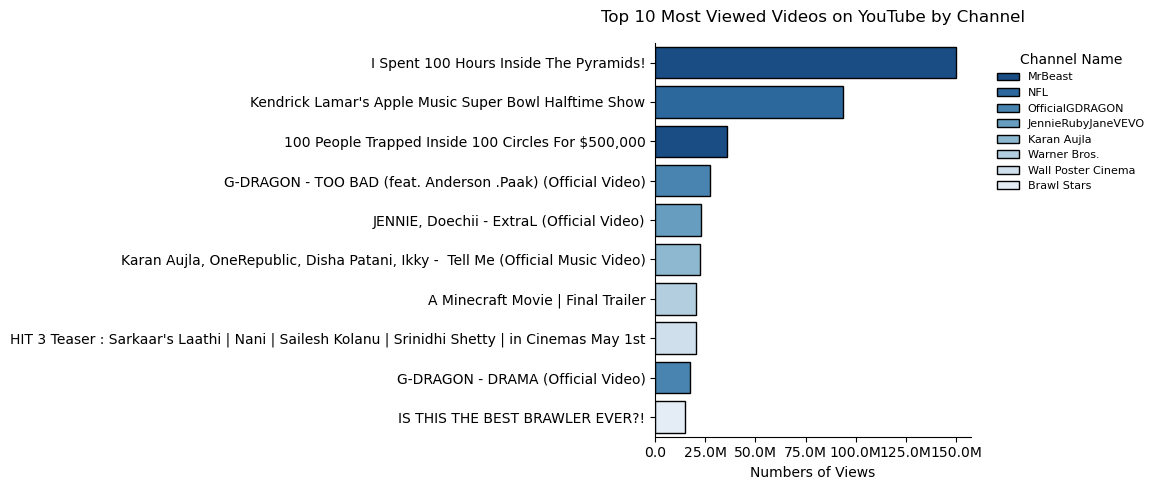

In [28]:
plt.figure(figsize=(12, 5))
sns.barplot(data=top_10_viewed, 
            x='view_count', 
            y='title',
            palette='Blues_r',
            edgecolor='k',
            hue='channel_title',
            #dodge=True,
            )

# Function to format the values
def num_format(x, pos):
    if x >= 1e6:
        return '{:1.1f}M'.format(x*1e-6)
    elif x >= 1e3:
        return '{:1.1f}K'.format(x*1e-3)
    else:
        return '{:1.1f}'.format(x)

# Applying the custom formatter to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(num_format))

plt.title('Top 10 Most Viewed Videos on YouTube by Channel', pad=15)
plt.xlabel('Numbers of Views')
plt.ylabel('')
plt.legend(title='Channel Name', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8, title_fontsize=10, frameon=False)

sns.despine()
plt.tight_layout()
plt.show()

**Key Insights:**

1. **MrBeast Dominates Viewer Engagement**:  
   - MrBeast holds **two of the top three most-viewed videos**, with "I Spent 100 Hours Inside The Pyramids!" securing the **#1 spot** (~150M views) and another challenge-based video ranking third (~40M views). This highlights the effectiveness of high-concept, immersive challenges in driving massive engagement.

2. **Live Events & Sports Content Attract Massive Audiences**:  
   - The NFL’s Super Bowl Halftime Show featuring Kendrick Lamar ranks **second** (~90M views), underscoring the power of live-event coverage and partnerships with popular artists to capture viral attention.

3. **K-Pop and Music Content Reign Supreme**:  
   - Multiple entries from **G-DRAGON** (OfficialGDRAGON channel) and **Jennie** (JennieRubyJaneVEVO) demonstrate the global reach of K-pop and music videos. Official releases remain a cornerstone of YouTube’s top content.

4. **Diverse Content Types Compete Effectively**:  
   - Beyond challenges and music, **gaming** (Brawl Stars), **movie trailers** (Warner Bros.’ *Minecraft Movie*), and **Hindi cinema** (Karan Aujla) showcase YouTube’s broad appeal. This diversity indicates opportunities for niche creators to break into mainstream viewership.


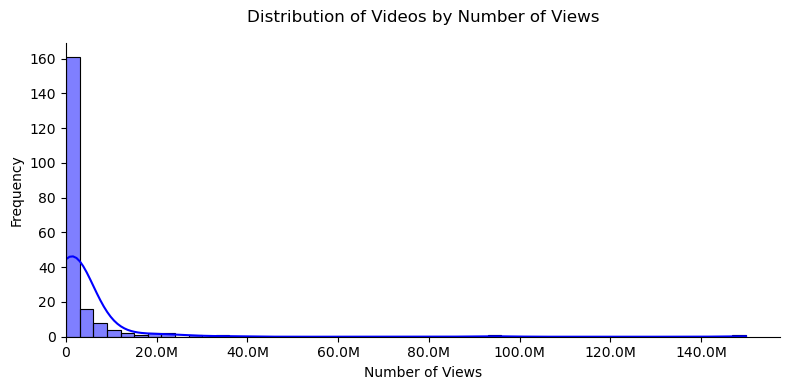

In [29]:
# videos distribution by views
plt.figure(figsize=(8, 4))

sns.histplot(data=df,
             x='view_count',
             bins=50,
             kde=True,
             edgecolor='k',
             color='blue'
             
)

# Function to format the values
def num_format(x, pos):
    if x >= 1e6:
        return '{:1.1f}M'.format(x*1e-6)
    elif x >= 1e3:
        return '{:1.0f}K'.format(x*1e-3)
    else:
        return '{:1.0f}'.format(x)

# Applying the custom formatter to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(num_format))

plt.title('Distribution of Videos by Number of Views', pad=15)
plt.ylabel('Frequency')
plt.xlabel('Number of Views')

plt.grid(False)
plt.xlim(0, None)
sns.despine()
plt.tight_layout()
plt.show()

**Key Insights:**  

1. **Highly Skewed Engagement Distribution**:  
   - The chart reveals a **power-law distribution**, where **a tiny fraction of videos garner the majority of views**. The first bar (likely representing videos with <5M views) dominates (~160 videos), while views plummet rapidly for higher-view ranges. This aligns with the "long-tail" phenomenon common in social media, where **most content receives minimal engagement**, and only outliers achieve viral success.  

2. **Viral Content Dominates Views**:  
   - A handful of videos (e.g., those in the 100M+ range) account for disproportionately high viewership. This echoes the earlier analysis of MrBeast and NFL content, reinforcing that **viral, high-concept videos** capture the lion’s share of attention.  


# Most Commented Videos by Youtube Channel
-   Lets analyze the top 10 most commented videos on youtube.

In [10]:
top_commented_videos = df.pivot_table(index=['title', 'channel_title'], 
                                      values='comment_count', 
                                      aggfunc='sum').sort_values('comment_count', ascending=False).head(10)

top_commented_videos

,,comment_count
title,channel_title,
Kendrick Lamar's Apple Music Super Bowl Halftime Show,NFL,175291
I Spent 100 Hours Inside The Pyramids!,MrBeast,92370
"JENNIE, Doechii - ExtraL (Official Video)",JennieRubyJaneVEVO,86698
LISA - FUTW (Vixi Solo Version) (Official Music Video),LLOUD Official,73738
IS THIS THE BEST BRAWLER EVER?!,Brawl Stars,53967
Hearts2Hearts 하츠투하츠 'The Chase' MV,SMTOWN,44811
G-DRAGON - TOO BAD (feat. Anderson .Paak) (Official Video),OfficialGDRAGON,40134
"100 People Trapped Inside 100 Circles For $500,000",MrBeast,33472
G-DRAGON - DRAMA (Official Video),OfficialGDRAGON,30922


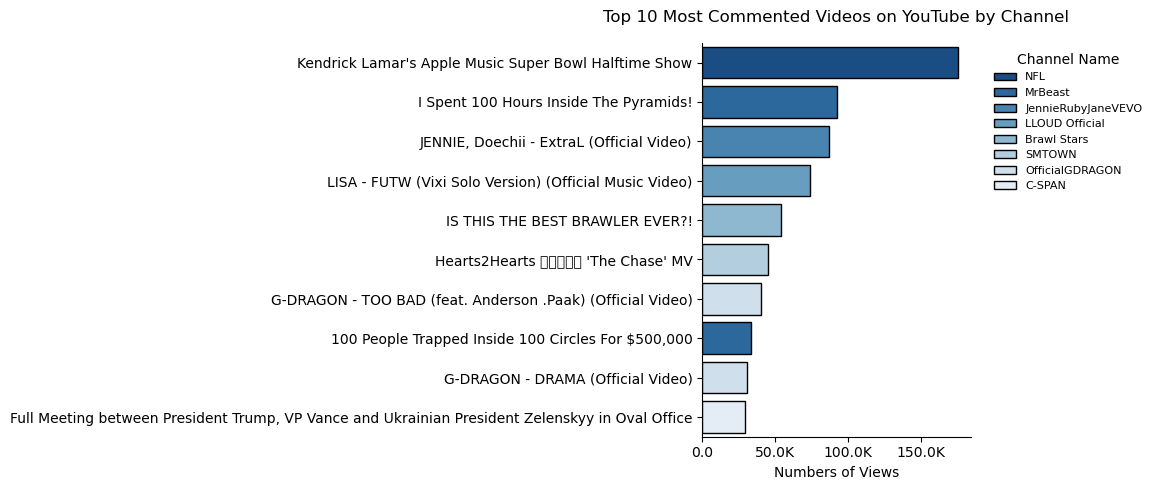

In [11]:
plt.figure(figsize=(12, 5))
sns.barplot(data=top_commented_videos, 
            x='comment_count', 
            y='title',
            palette='Blues_r',
            edgecolor='k',
            hue='channel_title',
            #dodge=True,
            )

# Function to format the values
def num_format(x, pos):
    if x >= 1e6:
        return '{:1.1f}M'.format(x*1e-6)
    elif x >= 1e3:
        return '{:1.1f}K'.format(x*1e-3)
    else:
        return '{:1.1f}'.format(x)

# Applying the custom formatter to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(num_format))

plt.title('Top 10 Most Commented Videos on YouTube by Channel', pad=15)
plt.xlabel('Numbers of Views')
plt.ylabel('')
plt.legend(title='Channel Name', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8, title_fontsize=10, frameon=False)

sns.despine()
plt.tight_layout()
plt.show()

**Key Insights:**  

1. **Live Events & Controversial Content Drive Discussion**:  
   - **NFL’s Super Bowl Halftime Show** tops the chart (~160K comments), highlighting how live events and performances generate intense viewer engagement. Similarly, **C-SPAN’s political meeting** (Trump-Zelenskyy) sparks heated debate, underscoring the link between controversy and comment activity.  

2. **Music Videos Foster Community Interaction**:  
   - K-pop artists dominate the list (**Jennie**, **Lisa**, **G-DRON**) with ~80–90K comments each. Fans engage in theories, reactions, and global coordination, making music videos hubs for passionate discourse.  

3. **Gaming Communities Thrive on Engagement**:  
   - **Brawl Stars’ gameplay video** ("IS THIS THE BEST BRAWLER EVER?") garners ~50K comments, reflecting the gaming community’s tendency to analyze strategies, share tips, and debate character mechanics.  

4. **MrBeast’s Challenge-Based Content Balances Views and Comments**:  
   - While his pyramid video ranked #1 in views, it drops to #2 in comments (~100K). This suggests challenges attract massive audiences but may not sustain prolonged discussion compared to live events or music.  

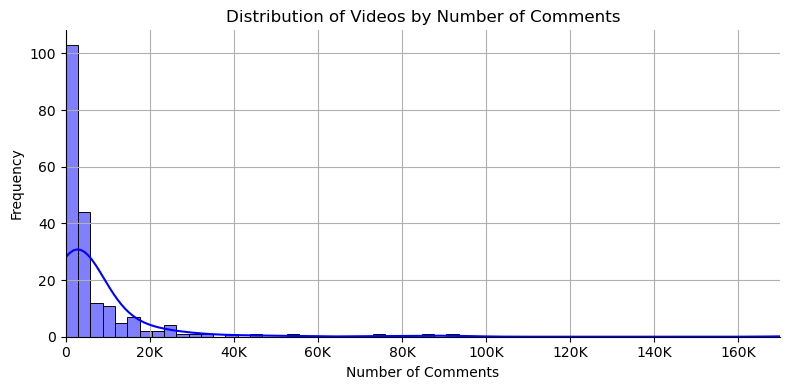

In [12]:
# videos distribution by comment
plt.figure(figsize=(8, 4))

sns.histplot(data=df,
             x='comment_count',
             bins=60,
             kde=True,
             palette='Blues_r',
             color='blue'
             
)

# Function to format the values
def num_format(x, pos):
    if x >= 1e6:
        return '{:1.1f}M'.format(x*1e-6)
    elif x >= 1e3:
        return '{:1.0f}K'.format(x*1e-3)
    else:
        return '{:1.0f}'.format(x)

# Applying the custom formatter to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(num_format))

plt.title('Distribution of Videos by Number of Comments')
plt.ylabel('Frequency')
plt.xlabel('Number of Comments')

plt.grid(True)
plt.xlim(0, 170000)
sns.despine()
plt.tight_layout()
plt.show()

**Key Insights:**  

1. **Extreme Skewness in Engagement**:  
   - The chart reveals a **power-law distribution**, where **a tiny fraction of videos dominate comment activity**. Most videos (~100) receive fewer than 5K comments, while a handful (e.g., the NFL Super Bowl Halftime Show) garner over 150K comments. This mirrors the "long-tail" trend observed in views, emphasizing that **only outliers achieve massive engagement**.  

2. **Viral Content Drives Commentary**:  
   - The steep drop-off post-20K comments highlights that **most videos fail to spark meaningful discussion**. Exceptions (e.g., live events, controversies) break through due to their emotional or cultural relevance, aligning with the earlier analysis of top-commented videos.  

3. **Contrast with Views Distribution**:  
   - While high-view videos (e.g., MrBeast’s challenges) may not always correlate with high comments, **content that provokes debate** (e.g., political meetings, live performances) tends to dominate both metrics. This suggests **contextual relevance** is critical for sustained engagement.

# Most Liked Videos by Youtube Channel
-   Lets analyze the top 10 most liked videos on youtube.

In [13]:
top_videos_by_likes = df.pivot_table(index=['title', 'channel_title'], 
                                     values='like_count'
                                     ).sort_values('like_count', ascending=False).head(10)

top_videos_by_likes = top_videos_by_likes.reset_index()
top_videos_by_likes

,title,channel_title,like_count
0,I Spent 100 Hours Inside The Pyramids!,MrBeast,4613046.0
1,Kendrick Lamar's Apple Music Super Bowl Halfti...,NFL,3039016.0
2,"JENNIE, Doechii - ExtraL (Official Video)",JennieRubyJaneVEVO,1621550.0
3,100 People Trapped Inside 100 Circles For $500...,MrBeast,1260536.0
4,LISA - FUTW (Vixi Solo Version) (Official Musi...,LLOUD Official,1174983.0
5,G-DRAGON - TOO BAD (feat. Anderson .Paak) (Off...,OfficialGDRAGON,568160.0
6,JENNIE - Ruby (Official Album Sampler),JENNIE,554752.0
7,IS THIS THE BEST BRAWLER EVER?!,Brawl Stars,507157.0
8,Hearts2Hearts 하츠투하츠 'The Chase' MV,SMTOWN,479860.0
9,G-DRAGON - DRAMA (Official Video),OfficialGDRAGON,427404.0


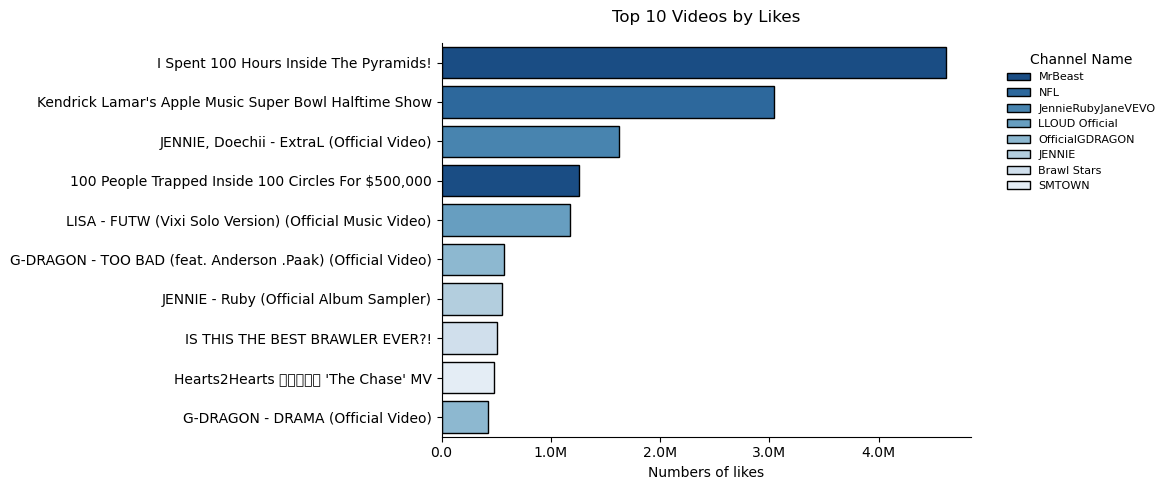

In [14]:
plt.figure(figsize=(12, 5))
sns.barplot(data=top_videos_by_likes,
            x='like_count',
            y='title',
            palette='Blues_r',
            edgecolor='k', 
            hue='channel_title',
            dodge=False,
            )

def num_format(x, pos):
    if x >= 1e6:
        return '{:1.1f}M'.format(x*1e-6)
    elif x >= 1e3:
        return '{:1.1f}K'.format(x*1e-3)
    else:
        return '{:1.1f}'.format(x)

# Applying the custom formatter to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(num_format))

plt.title('Top 10 Videos by Likes', pad=15)
plt.xlabel('Numbers of likes')
plt.ylabel("")
plt.legend(title='Channel Name', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8, title_fontsize=10, frameon=False)

sns.despine()
plt.tight_layout()
plt.show()

**Key Insights:**  

1. **MrBeast’s Challenge Content Dominates Positive Sentiment**:  
   - MrBeast’s "I Spent 100 Hours Inside The Pyramids!" leads with **~4.5M likes**, reaffirming the appeal of high-concept, immersive challenges that resonate emotionally with audiences.  

2. **Live Events & Sports Content Spark Broad Approval**:  
   - The NFL’s Super Bowl Halftime Show ranks second (~3M likes), highlighting how live events and performances garner widespread approval, likely due to their cultural relevance and entertainment value.  

3. **K-Pop Music Videos Drive Consistent Engagement**:  
   - Multiple entries from **Jennie**, **Lisa**, and **G-DRAGON** (SMTOWN/OfficialGDRAGON channels) secure mid-tier rankings (~500K–1.5M likes). This reflects the global fandom’s loyalty and tendency to engage positively with official releases.  

4. **Contrast Between Likes and Comments**:  
   - While MrBeast’s video tops likes, the NFL’s content generates more comments (earlier analysis). This suggests **challenges inspire admiration** (likes), while **live events provoke discussion** (comments).  

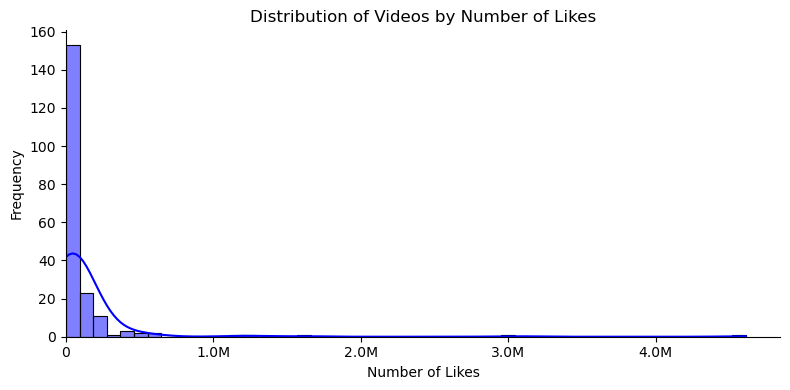

In [15]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df,
             x='like_count',
             bins=50,
             color='blue',
             kde=True,
             edgecolor='k'
             )

# Function to format the values
def num_format(x, pos):
    if x >= 1e6:
        return '{:1.1f}M'.format(x*1e-6)
    elif x >= 1e3:
        return '{:1.0f}K'.format(x*1e-3)
    else:
        return '{:1.0f}'.format(x)

# Applying the custom formatter to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(num_format))

plt.title('Distribution of Videos by Number of Likes')
plt.ylabel('Frequency')
plt.xlabel('Number of Likes')
plt.xlim(0, None)
sns.despine()
plt.tight_layout()
plt.show()


**Key Insights:**  

1. **Extreme Skewness in Engagement**:  
   - The chart reveals a **power-law distribution**, where **a tiny fraction of videos dominate like activity**. Most videos (~150) receive fewer than 50K likes, while a handful (e.g., MrBeast’s pyramid challenge) garner over 4M likes. This mirrors the "long-tail" trend observed in views and comments, emphasizing that **only outliers achieve massive engagement**.  

2. **Algorithmic Amplification of Viral Content**:  
   - The steep drop-off post-100K likes highlights YouTube’s algorithmic bias toward promoting content that gains initial traction. Videos with rapid early engagement enter a feedback loop, receiving more visibility and likes, while others stagnate.  

3. **Contrast Between Top-Liked and Average Videos**:  
   - While MrBeast’s challenge video dominates likes (~4.5M), most videos fail to surpass 50K. This underscores the **rarity of viral success** and the challenge for creators to break through the noise.  

# Viewed, Commented and Liked Videos Correlation
-   Lets see the correlation between views, comments and likes:


In [16]:
df.columns

Index(['video_id', 'title', 'description', 'published_at', 'channel_id',
       'channel_title', 'category_id', 'tags', 'duration', 'definition',
       'caption', 'view_count', 'like_count', 'dislike_count',
       'favorite_count', 'comment_count', 'publish_hour'],
      dtype='object')

In [17]:
view_comment_like_corr = df[['view_count', 'comment_count', 'like_count']].corr()

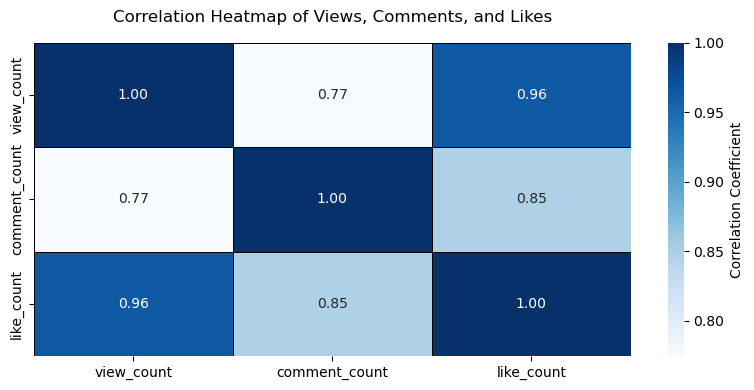

In [18]:
plt.figure(figsize=(8, 4))
sns.heatmap(view_comment_like_corr, 
            annot=True, 
            cmap='Blues', 
            fmt='.2f', 
            linewidths=0.5,
            linecolor='black',
            cbar_kws={'label': 'Correlation Coefficient'},
            )

plt.title('Correlation Heatmap of Views, Comments, and Likes', pad=15)
plt.tight_layout()
plt.show()

In [19]:
df

,video_id,title,description,published_at,channel_id,channel_title,category_id,tags,duration,definition,caption,view_count,like_count,dislike_count,favorite_count,comment_count,publish_hour
0,wsCmWZSASes,"Tank vs Roach FIGHT HIGHLIGHTS: March 1, 2025 ...",Gervonta Davis and Lamont Roach fought an epic...,2025-03-02 06:35:42+00:00,UCWXYAGB9SadlL6p5Bb66wWw,Premier Boxing Champions,17,"['Boxing', 'Gervonta Davis', 'Gervonta Davis v...",PT3M22S,hd,False,2486351,23841,0,0,6725,6
1,mS8W6NY6QjQ,FULL SEGMENT: John Cena SELLS OUT and ruthless...,After Undisputed WWE Champion Cody Rhodes emph...,2025-03-02 05:03:43+00:00,UCJ5v_MCY6GNUBTO8-D3XoAg,WWE,17,"['Cody Rhodes', 'John Cena', 'The Rock', 'Trav...",PT17M23S,hd,True,3695350,136355,0,0,23592,5
2,kmXkr7I8gYo,Tank Davis vs Roach FIGHT HIGHLIGHTS | Premier...,"In a back and forth battle At Barclays Center,...",2025-03-02 05:45:58+00:00,UC2Ss8mXyksW2SQfhhUpgR2g,Sports On Prime,17,[],PT6M10S,hd,False,505161,4137,0,0,2392,5
3,fpBqWFhefNA,Gervonta Davis FULL Post Fight Press Conferenc...,In this video we hear from Gervonta Davis afte...,2025-03-02 07:56:54+00:00,UCwdVyruxCCqMR4DtPLhtwlg,Fight Hub TV,17,"['boxing', 'fight hub', 'fight hub tv', 'fight...",PT14M15S,hd,False,576349,7553,0,0,4290,7
4,1mtJvsfAtF0,Sabrina Carpenter - Espresso/Bed Chem (Live at...,Sabrina Carpenter performs “Espresso” & “Bed C...,2025-03-02 02:30:47+00:00,UC4mYKePIas5YgGfYZ2J2OxQ,SabrinaCarpenterVEVO,10,"['Sabrina Carpenter', 'Island Records', 'Pop']",PT5M13S,hd,True,1529450,90686,0,0,4110,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,pc8V5wxAXGk,The Insane Design of Soviet Nukes,"With Odoo, it's fast, and incredibly easy to c...",2025-02-21 14:01:08+00:00,UCODHrzPMGbNv67e84WDZhQQ,fern,24,[],PT20M55S,hd,False,2254105,75176,0,0,3532,14
196,aQMKAZpcynA,MARINA - BUTTERFLY (Official Video),"Stream ""BUTTERFLY"" here: https://marina.lnk.to...",2025-02-21 16:00:06+00:00,UCO_hWjivU900eBRkSQNtlAw,MARINA,10,"['marina', 'marina diamandis', 'ancient dreams...",PT4M26S,hd,True,1831055,137903,0,0,11212,16
197,cFHElRaF19s,"Selena Gomez, benny blanco, Gracie Abrams - Ca...","Selena Gomez, benny blanco, Gracie Abrams - Ca...",2025-02-21 00:00:06+00:00,UCjK8ORC71kwyj1DWFwril_A,SelenaGomezVEVO,10,"['Selena Gomez', 'benny blanco', 'Gracie Abram...",PT2M9S,hd,True,4000538,167411,0,0,9067,0
198,oz5w8c9HFmc,MINECRAFT GAMBLE: PILOT,"In RNG Village, everyone's lives is a GAMBLE.....",2025-02-21 16:01:04+00:00,UClcqpZhHYcoRADrYmaGqVZA,Joll and Conk,22,[],PT20M5S,hd,False,1025355,24226,0,0,3487,16


# Videos Duration Analysis


### Video Length vs. View Count

In [20]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='duration_seconds', y='view_count', data=df, alpha=0.6, color='blue')


plt.title('Video Length vs View Count')
plt.xlabel('Video Length (seconds)')
plt.ylabel('View Count')

# Function to format the values
def num_format(y, pos):
    if y >= 1e6:
        return '{:1.0f}M'.format(y*1e-6)
    elif y >= 1e3:
        return '{:1.1f}K'.format(y*1e-3)
    else:
        return '{:1.1f}'.format(y)

# Applying the custom formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(num_format))

sns.despine()
plt.tight_layout()
plt.show()



ValueError: Could not interpret value `duration_seconds` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x400 with 0 Axes>

**Key Insights**
-   The scatter plot reinforces the idea that **video length is just one factor in determining view count**. Success depends on a combination of content quality, audience targeting, and strategic promotion. Creators should carefully consider their goals, audience preferences, and content type when deciding on video length.

### Average Views, Likes, and Comments by Video Length Range


In [21]:
import isodate  # Import the isodate library to handle ISO 8601 duration format

# Convert ISO 8601 duration strings into total seconds
df['duration_seconds'] = df['duration'].apply(lambda x: isodate.parse_duration(x).total_seconds())

# Categorize videos into predefined duration ranges
df['duration_range'] = pd.cut(
    df['duration_seconds'],  # The column containing video durations in seconds
    bins=[0, 300, 600, 1200, 3600],  # Define the bin edges for classification
    labels=['0-5 min', '5-10 min', '10-20 min', '20-60 min']  # Assign labels to each range
)

In [22]:
length_engagement = df.groupby('duration_range')[['view_count', 'like_count', 'comment_count']].mean()
length_engagement.reset_index(inplace=True)
length_engagement

,duration_range,view_count,like_count,comment_count
0,0-5 min,4.136881e+06,134861.106061,8611.060606
1,5-10 min,1.607703e+06,71954.347826,5344.000000
2,10-20 min,3.346863e+06,112322.750000,8858.500000
3,20-60 min,4.718777e+06,158661.407407,6077.666667


#### Average Views by Video Length Range


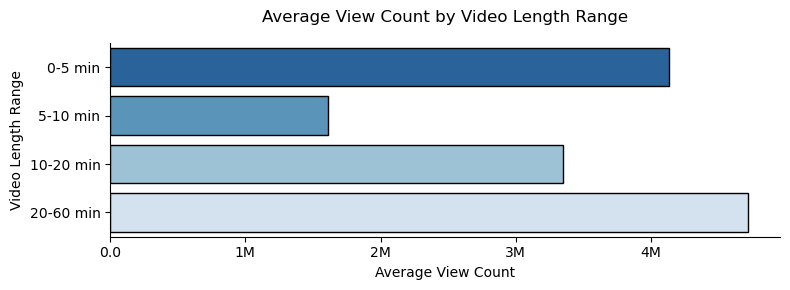

In [23]:
plt.figure(figsize=(8, 3))
# view count by duration range
sns.barplot(data=length_engagement,
            y='duration_range', 
            x='view_count', 
            palette='Blues_r',
            edgecolor='k',
            )

# Function to format the values
def num_format(x, pos):
    if x >= 1e6:
        return '{:1.0f}M'.format(x*1e-6)
    elif x >= 1e3:
        return '{:1.1f}K'.format(x*1e-3)
    else:
        return '{:1.1f}'.format(x)

# Applying the custom formatter to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(num_format))

plt.title('Average View Count by Video Length Range', pad=15)
plt.xlabel('Average View Count')
plt.ylabel('Video Length Range')

sns.despine()
plt.tight_layout()
plt.show()

**Key Insights:**  
-   The chart highlights a clear trend: **short videos (0-5 minutes) dominate in terms of average views**
-   **longer videos (20-60 minutes) also perform well for niche audiences**. 
-   Mid-length videos (5-10 minutes and 10-20 minutes) struggle to compete due to their lack of focus and inability to deliver the same level of engagement as shorter or longer formats.
-   Creators should strategically choose video lengths based on their content type, target audience, and engagement goals.

#### Average Likes by Video Length Range


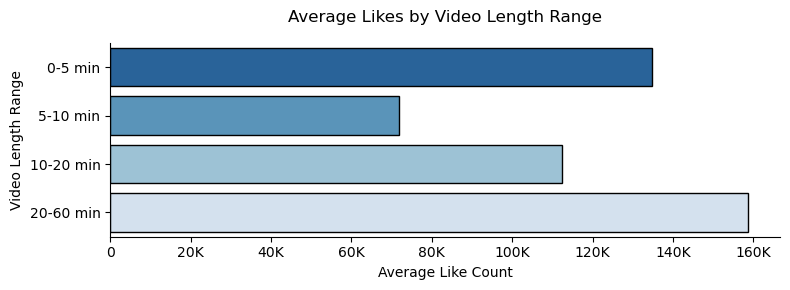

In [24]:
plt.figure(figsize=(8, 3))
sns.barplot(data=length_engagement,
            y='duration_range', 
            x='like_count', 
            palette='Blues_r',
            edgecolor='k'
            )


# Function to format the values
def num_format(x, pos):
    if x >= 1e6:
        return '{:1.0f}M'.format(x*1e-6)
    elif x >= 1e3:
        return '{:1.0f}K'.format(x*1e-3)
    else:
        return '{:1.0f}'.format(x)

# Applying the custom formatter to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(num_format))

plt.title('Average Likes by Video Length Range', pad=15)
plt.xlabel('Average Like Count')
plt.ylabel('Video Length Range')

sns.despine()
plt.tight_layout()
plt.show()

**Key Insight:**
- **Short Videos (0-5 Minutes) and Long Videos (20-60 Minutes) Perform Best in Terms of Average Likes.**
   - The **0-5-minute range** has an average like count of approximately **135K likes**, indicating that short videos are highly engaging and tend to receive strong positive feedback.
   - The **20-60-minute range** achieves the highest average like count, with approximately **160K likes**, suggesting that longer videos can also perform exceptionally well if they provide substantial value or cater to niche audiences.

#### Average Comments by Video Length Range


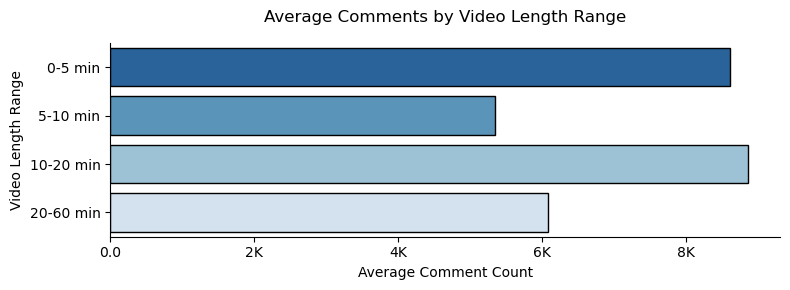

In [ ]:
plt.figure(figsize=(8, 3))
sns.barplot(data=length_engagement,
            y='duration_range', 
            x='comment_count', 
            palette='Blues_r',
            edgecolor='k'
            )


# Function to format the values
def num_format(x, pos):
    if x >= 1e6:
        return '{:1.1f}M'.format(x*1e-6)
    elif x >= 1e3:
        return '{:1.0f}K'.format(x*1e-3)
    else:
        return '{:1.1f}'.format(x)

# Applying the custom formatter to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(num_format))

plt.title('Average Comments by Video Length Range', pad=15)
plt.xlabel('Average Comment Count')
plt.ylabel('Video Length Range')

sns.despine()
plt.tight_layout()
plt.show()

**Key Insight:**
- **Short Videos (0-5 Minutes) and Mid-Length Videos (10-20 Minutes) Perform Best in Terms of Average Comments.**
   - The **0-5-minute range** has an average comment count of approximately **8,500 comments**, indicating that short videos are highly interactive and tend to spark discussions.
   - The **10-20-minute range** achieves the highest average comment count, with approximately **9,000 comments**, suggesting that mid-length videos can also foster strong engagement if they provide substantial value or encourage viewer interaction.

# Publish Hour Analysis


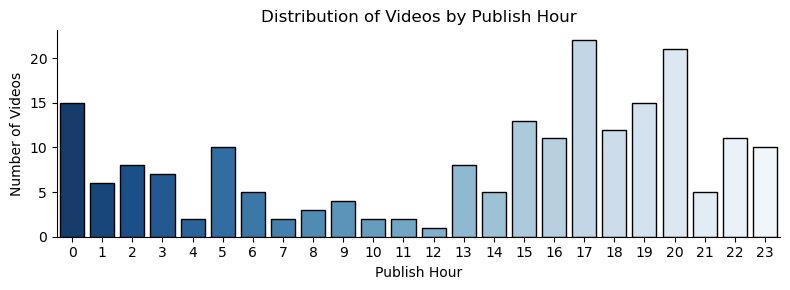

In [ ]:
# bar chart for publish hour distribution
plt.figure(figsize=(8, 3))
sns.countplot(data=df, 
              x='publish_hour', 
              palette='Blues_r', 
              edgecolor='k'
              
              )
plt.title('Distribution of Videos by Publish Hour')
plt.xlabel('Publish Hour')
plt.ylabel('Number of Videos')

sns.despine()
plt.tight_layout()
plt.show()

**Key Insights**

1. **Peak Publishing Hours:**
   - **5 PM (hour 17)** and **8 PM (hour 20)** are the busiest publishing times, likely due to alignment with audience activity and creator workflows.

2. **Low Activity During Early Morning:**
   - Video publishing is minimal during early morning hours (3 AM–6 AM), reflecting typical human rest patterns.

3. **Midday Dip:**
   - Publishing activity drops during midday (10 AM–2 PM), possibly due to work breaks or lunch hours.

4. **Evening Surge:**
   - Publishing activity spikes in the late afternoon and early evening (4 PM–8 PM), aligning with higher audience engagement.

5. **Consistent Workflow:**
   - Content creators maintain a steady publishing rhythm throughout the day, with variations based on strategic timing and audience activity.

**Final Conclusion**

-  The distribution of videos by publish hour reveals a clear pattern of strategic publishing aligned with audience activity. Creators should prioritize publishing during peak hours (5 PM and 8 PM) to maximize engagement while maintaining a consistent workflow throughout the day. By understanding these patterns, creators can optimize their publishing strategies to reach their target audience effectively.

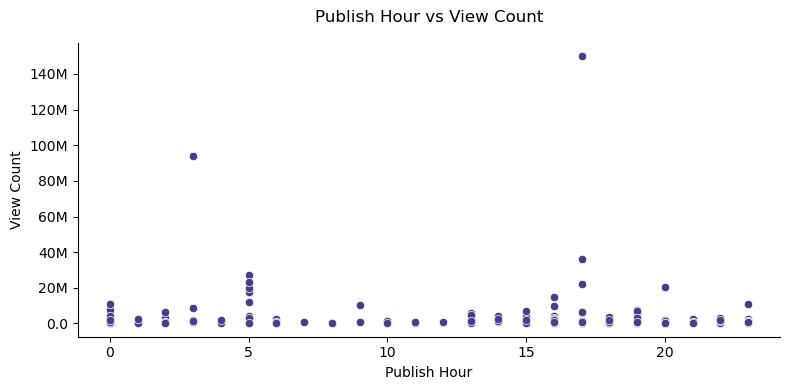

In [ ]:
# scatter plot for publish hour vs view count
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df,
                x='publish_hour', 
                y='view_count', 
                color='darkslateblue',               
                
                )

# Function to format the values
def num_format(y, pos):
    if y >= 1e6:
        return '{:1.0f}M'.format(y*1e-6)
    elif y >= 1e3:
        return '{:1.1f}K'.format(y*1e-3)
    else:
        return '{:1.1f}'.format(y)

# Applying the custom formatter to the x-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(num_format))

plt.title('Publish Hour vs View Count', pad=15)
plt.xlabel('Publish Hour')
plt.ylabel('View Count')


sns.despine()
plt.tight_layout()
plt.show()

**Key Takeaways**

1. **Content Quality Trumps Publish Time**:
   - The publish hour alone does not guarantee high view counts. High-quality, engaging content is the primary driver of viral success.

2. **Strategic Timing Can Help, but Is Not Deterministic**:
   - While certain hours (e.g., 5 PM, 8 PM) may align with peak audience activity, successful videos can still be published at any time if the content resonates with viewers.

3. **Consistency in Publishing**:
   - Creators should maintain a consistent publishing schedule to ensure regular engagement with their audience.

4. **Focus on Audience Behavior**:
   - Analyze your specific audience’s viewing patterns to determine the best times to publish content for maximum reach.

-----------


**Conclusion:**

-
   This project provided an insightful deep dive into YouTube video analytics, uncovering key trends and patterns that influence audience engagement. By analyzing metrics such as views, likes, comments, and publishing times, I was able to identify strategic opportunities for content creators to optimize their reach and impact. Key takeaways include the importance of consistent publishing rhythms, aligning with peak audience activity periods (like evenings), and leveraging engaging content formats to maximize interaction. This analysis underscores the value of data-driven decision-making in content creation and digital strategy—an essential skill in today’s dynamic media landscape. Grateful for the opportunity to work on this project and excited to apply these insights to future endeavors!

**Prepared by :   Mohamed Fawzi**

**E-mail      :   modyreturn@gmail.com**

**Github      :   https://github.com/modyreturn**

----------------